<a href="https://colab.research.google.com/github/NicoEssi/Data_Science_Portfolio/blob/master/Stackoverflow_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Setup

In [0]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Downloading the Stack Overflow Survey Results for 2019
!wget --no-check-certificate \
    "https://drive.google.com/uc?authuser=0&id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV&export=download" \
    -O "/tmp/soi_2019.zip"
zip_ref = zipfile.ZipFile("/tmp/soi_2019.zip", 'r')
zip_ref.extractall("/tmp/soi_2019")
zip_ref.close()

--2019-09-11 20:50:26--  https://drive.google.com/uc?authuser=0&id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV&export=download
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.113, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV&export=download [following]
--2019-09-11 20:50:26--  https://drive.google.com/uc?id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1nskha176ceftan47spe2dtkrishqror/1568232000000/06716978924947585995/*/1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV?e=download [following]
--2019-09-11 20:50:28--  https://doc-14-4c-docs.googleusercontent.com/docs/securesc

## Custom Functions

In [0]:
# Encode single label
def encode(data):
    return data.str.get_dummies()

# Encode multiple labels
def encodem(data):
    return data.str.get_dummies(sep=";")

In [0]:
# Parse all types within a data into a list
def parse_types(data):
    types_temp = []
    for i in range( len(data)):
        types_temp.append([parsed.strip() for parsed in str(data.iloc[i]).split(';')])
    
    types = []
    for i in types_temp:
        for j in i:
            if j not in types:
                types.append(j)
                
    return types

# Parse datarow of all text into a list
def parse(data):
    return [parsed.strip() for parsed in str(data).split(';')]

# Check whether text exists in data
def check(text, data):
    if text in parse(data):
        return 1
    else:
        return 0

# Count occurences of text in data
def countd(text, data):
    counted = []
    
    for i in data:
        counted.append(check(text, i))
    
    return sum(counted)


def copypaste(text, column, data):
    copypaste = []
    
    for i in range( len(data)):
        if check(text, data[column].iloc[i]):
            copypaste.append(data.iloc[i])
    
    return copypaste

In [0]:
# Check salary for specific category
def check_average_salary(category, column, data):
    salaries = []
    for i in range( len(data) ):
        if category in parse(data[column].iloc[i]):
            salaries.append(data.CompTotal.iloc[i])
    return sum(salaries)/len(salaries)


# Check salary for specific column
def print_average_salary_column(column, data):
    for i in parse_types(data[column]):
        print(str(i) + ": " + str(check_average_salary(i, column, data)))
        

# Plot salary for specific column
#plt.rcParams['figure.figsize'] = [15, 5] # Set figure size
def average_salary_column(column, data, plot = False):
    ybucket = []
    xbucket = []
    for i in parse_types(data[column]):
        ybucket.append(check_average_salary(i, column, data))
        xbucket.append(i)
    bucket = pd.DataFrame(ybucket, xbucket)
    if plot:
        bucket.plot(kind = "bar")
        plt.show()
    else:
        return bucket

In [0]:
# Receive the rows with specified category in column within data
def receive(category, column, data):
    bucket = []
    for i in range( len(data) ):
        if category in parse(data[column].iloc[i]):
            bucket.append(data.iloc[i])
    return bucket

#len(pd.DataFrame(receive("Data scientist or machine learning specialist", "DevType", data_eu)))

In [0]:
# currency rates as of 09/09/2019
"""
EUR = 1.10
CHF = 1.00
SEK = 0.10
NOK = 0.11
DKK = 0.15
USD = 1.00
GBP = 1.23
INR = 0.014
NZD = 0.64
AUD = 0.69
CAD = 0.76
"""

currencies = {"EUR" : 1.10
             ,"CHF" : 1.00
             ,"SEK" : 0.10
             ,"NOK" : 0.11
             ,"DKK" : 0.15
             ,"USD" : 1.00
             ,"GBP" : 1.23
             ,"INR" : 0.014
             ,"NZD" : 0.64
             ,"AUD" : 0.69
             ,"CAD" : 0.76}

# Convert currency into USD
def currency_usd(data):
    if data in (currencies):
        return currencies[data]
    else:
        return 0

# Annualize total compensation
def currency_annualize(data):
    if data == 'Weekly':
        return 52
    elif data == 'Monthly':
        return 12
    elif data == 'Yearly':
        return 1

# 1. Business- & Data Understanding

Read the data and initial exploration of questions to determine which features are important for further inquiry.

In [0]:
data = pd.read_csv("/tmp/soi_2019/survey_results_public.csv")
schema = pd.read_csv("/tmp/soi_2019/survey_results_schema.csv")

In [0]:
#for i in range(len(schema)):
#    print(schema.iloc[i].Column + " : " + schema.iloc[i].QuestionText)

Clean data of rows with missing salary information.

In [13]:
print("NA Count: " + str(np.sum(data.Country == "United States")
                        + np.sum(data.Country == "Canada")))
print("UK Count: " + str(np.sum(data.Country == "United Kingdom")))
print("EU Count: " + str(np.sum(data.Country == "France")
                        + np.sum(data.Country == "Germany")
                        + np.sum(data.Country == "Sweden")
                        + np.sum(data.Country == "Denmark")
                        + np.sum(data.Country == "Finland")
                        + np.sum(data.Country == "Ireland")
                        + np.sum(data.Country == "Netherlands")
                        + np.sum(data.Country == "Austria")
                        + np.sum(data.Country == "Belgium")
                        + np.sum(data.Country == "Switzerland")))

NA Count: 24344
UK Count: 5737
EU Count: 15591


In [14]:
print("Before: " + str(len(data.CompTotal)))

data = data[pd.notnull(data['CompFreq'])]
data = data[pd.notnull(data['CompTotal'])].reset_index(drop = True)

print("After: " + str(len(data.CompTotal)))

Before: 88883
After: 55827


In [15]:
print("NA Count: " + str(np.sum(data.Country == "United States")
                        + np.sum(data.Country == "Canada")))
print("UK Count: " + str(np.sum(data.Country == "United Kingdom")))
print("EU Count: " + str(np.sum(data.Country == "France")
                        + np.sum(data.Country == "Germany")
                        + np.sum(data.Country == "Sweden")
                        + np.sum(data.Country == "Denmark")
                        + np.sum(data.Country == "Finland")
                        + np.sum(data.Country == "Ireland")
                        + np.sum(data.Country == "Netherlands")
                        + np.sum(data.Country == "Austria")
                        + np.sum(data.Country == "Belgium")
                        + np.sum(data.Country == "Switzerland")
                        + np.sum(data.Country == "Norway")))

NA Count: 17238
UK Count: 4036
EU Count: 10744


In [64]:
devtypes = parse_types(data.DevType)
eduother = parse_types(data.EduOther)
languages = parse_types(data.LanguageWorkedWith)
databases = parse_types(data.DatabaseWorkedWith)
platforms = parse_types(data.PlatformWorkedWith)
webframes = parse_types(data.WebFrameWorkedWith)
misctechs = parse_types(data.MiscTechWorkedWith)

print(devtypes)
print(eduother)
print(languages)
print(databases)
print(platforms)
print(webframes)
print(misctechs)

['Developer, full-stack', 'Database administrator', 'Developer, back-end', 'Developer, front-end', 'Developer, QA or test', 'DevOps specialist', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Developer, desktop or enterprise applications', 'Developer, game or graphics', 'Educator', 'Developer, mobile', 'Engineer, data', 'Engineer, site reliability', 'Engineering manager', 'Senior executive/VP', 'System administrator', 'Student', 'Designer', 'Developer, embedded applications or devices', 'Product manager', 'Academic researcher', 'Scientist', 'Marketing or sales professional', 'nan']
['Taken an online course in programming or software development (e.g. a MOOC)', 'Received on-the-job training in software development', 'Taught yourself a new language, framework, or tool without taking a formal course', 'Participated in a full-time developer training program or bootcamp', 'Taken a part-time in-person course in programming or software development', 'Participate

## We are interested in creating a model that can accurately predict salaries based on numerous factors within each region.

### Why do we group up many countries together into a single dataset for EU data?
Professionals residing within the European Union have liberties granted to them by the Schengen agreement, which enables free movement of labor force and thus professionals can freely work wherever they wish.

### Why are Norway and Switzerland included in the European dataset?
While they are not part of the European Union, they have signed agreements in association with the Schengen agreement.

### Why is the United Kingdom not included in the European dataset despite having signed an agreement in association with the Schengen agreement?
Brexit. Despite the fact that the data has been gathered prior to the secession deadline, it would still be interesting to inquire on the UK data separately in case it would be of interest to compare changes in 2020 and onwards. And as of writing this, nothing has been officially said regarding future signed agreement in association with the Schengen agreement for UK.

### Why are the countries in APT / RCEP not included?
Unfortunately the data gathered for China, South Korea, and Japan are too small to make reliable inferences - and there are currently significant restrictions in freedom of movement for professionals between these countries, making it unreasonable to conduct an inquiry on these countries as a collective.

# 2. Data Preparation

In [16]:
del data['Respondent']

print(len(data))

data = data[data["MainBranch"] == 'I am a developer by profession']
data = data[data["LastHireDate"] != "I've never had a job"]

print(len(data))

55827
50397


Total compensation preprocessing and calibration.

In [0]:
y_label = data.CompTotal * data.CompFreq.apply(currency_annualize)
y_label = y_label * data.CurrencySymbol.apply(currency_usd)

In [43]:
y = y_label.copy()

y = y[y < 500000]
y = y[y > 15000]

pd.set_option('float_format', '{:f}'.format)
y.describe(percentiles = [.01, .1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

count    32278.000000
mean     86846.166500
std      64512.145260
min      15036.000000
1%       16800.000000
10%      30250.000000
20%      40858.632000
30%      50400.000000
40%      60000.000000
50%      70000.000000
60%      82500.000000
70%      99000.000000
80%     120000.000000
90%     156000.000000
99%     376380.000000
max     499200.000000
dtype: float64

In [0]:
relevant = ["Hobbyist", "OpenSourcer", "Employment", "Country",
            "Student", "EdLevel", "UndergradMajor", "EduOther",
            "OrgSize","DevType", "YearsCodePro", "JobSeek",
            "LastHireDate", "FizzBuzz", "LanguageWorkedWith",
            "DatabaseWorkedWith", "PlatformWorkedWith",
            "WebFrameWorkedWith", "MiscTechWorkedWith",
           "CompTotal", "CompFreq", "CurrencySymbol"]


# Handling the NA dataset
data_na = data[data["Country"].isin(["United States", "Canada"])]
data_na = data_na[relevant]

data_na["CompTotal"] *= data_na.CompFreq.apply(currency_annualize)
data_na["CompTotal"] *= data_na.CurrencySymbol.apply(currency_usd)
del data_na["CompFreq"]
del data_na["CurrencySymbol"]
data_na = data_na[data_na["CompTotal"] < 500000]
data_na = data_na[data_na["CompTotal"] > 15000]


# Handling the UK dataset
data_uk = data[data["Country"] == "United Kingdom"]
data_uk = data_uk[relevant]

data_uk["CompTotal"] *= data_uk.CompFreq.apply(currency_annualize)
data_uk["CompTotal"] *= data_uk.CurrencySymbol.apply(currency_usd)
del data_uk["CompFreq"]
del data_uk["CurrencySymbol"]
#del data_uk["Country"] # Needs to remain for the custom functions to work
data_uk = data_uk[data_uk["CompTotal"] < 500000]
data_uk = data_uk[data_uk["CompTotal"] > 15000]


# Handling the EU dataset
data_eu = data[data["Country"].isin(["France", "Germany", "Sweden",
                                     "Denmark", "Finland", "Norway",
                                     "Ireland", "Netherlands", "Austria",
                                     "Belgium", "Switzerland"])]
data_eu = data_eu[relevant]

data_eu["CompTotal"] *= data_eu.CompFreq.apply(currency_annualize)
data_eu["CompTotal"] *= data_eu.CurrencySymbol.apply(currency_usd)
del data_eu["CompFreq"]
del data_eu["CurrencySymbol"]
data_eu = data_eu[data_eu["CompTotal"] < 500000]
data_eu = data_eu[data_eu["CompTotal"] > 15000]

# 3. Data Exploration

In [0]:
for i in relevant:
    print(i + ": ")
    print(data[i].unique())
    
"""
Hobbyist: onehotencode
OpenSourcer: onehotencoding
Employment: onehotencoding
Country: onehotencoding
Student: onehotencoding
EdLevel: onehotencoding
UndergradMajor: onehotencoding
EduOther: multilabelencoder
OrgSize: onehotencoding
DevType: multilabelencoder
YearsCode: numerical
YearsCodePro: numerical
JobSeek: onehotencoding
LastHireDate: onehotencoding
FizzBuzz: onehotencode
CompTotal : y
Languages: multilabel
Database: multilabel
Platform: multilabel
Webframes: multilabel
MiscTech: multilabel
"""

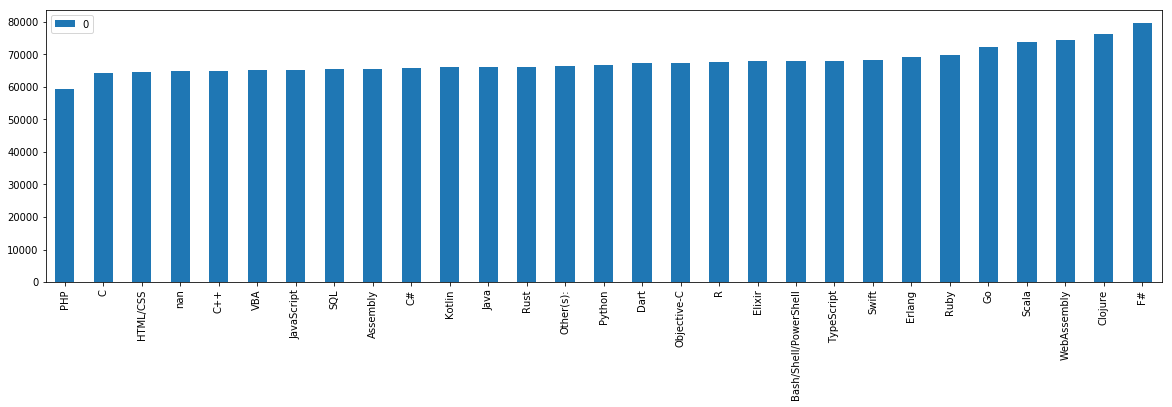

In [147]:
#plot_average_salary_column("DevType", data_eu[data_eu["Country"].isin(["Sweden"])])

#average_salary_column("LanguageWorkedWith", data_eu).sort_values(0).plot(kind = "bar")
#plt.show()

#check_average_salary_column("LanguageWorkedWith", data_eu[data_eu["Country"].isin(["Sweden"])])        

#check_average_salary("Data scientist or machine learning specialist", "DevType", data_eu)

In [127]:
bucket.sort_values(0).plot()

,0
Student,42456.900000
Designer,62085.493732
Academic researcher,62187.863544
"Developer, game or graphics",62747.615888
System administrator,63553.932379
Database administrator,64002.329948
Scientist,64253.032372
"Developer, front-end",64292.666817
"Developer, QA or test",65092.255850
"Developer, mobile",66334.386439


In [70]:
data_eu.DevType.iloc[5]

data_eu.CompTotal.iloc[5]

data_eu.Country.iloc[5]

parse(data_eu.DevType.iloc[5])

['Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Developer, full-stack',
 'Educator',
 'Marketing or sales professional',
 'Student',
 'System administrator']

In [0]:
#hob = encode(data["Hobbyist"])
#ope = encode(data["OpenSourcer"])

data_model = pd.concat([encode(data["Hobbyist"]),
                        encode(data["OpenSourcer"])
                       ,encode(data["Employment"])
                       ,encode(data["Country"])
                       ,encode(data["Student"])
                       ,encode(data["EdLevel"])
                       ,encode(data["UndergradMajor"])
                       ,encodem(data["EduOther"])
                       ,encode(data["OrgSize"])], axis = 1)
#encodem(data["DevType"])

In [46]:
data_model

,No,Yes,Less than once a month but more than once per year,Less than once per year,Never,Once a month or more often
1,1,0,0,0,1,0
3,0,1,0,0,0,1
4,0,1,0,0,0,1
5,0,1,1,0,0,0
6,0,1,0,1,0,0
7,0,1,0,0,1,0
8,0,1,1,0,0,0
10,0,1,0,0,1,0
12,0,1,0,1,0,0
13,0,1,0,1,0,0
